<a href="https://www.kaggle.com/code/kuntalmukherjee99/ibm-telco-churn-dataset?scriptVersionId=95681670" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


### The ovear all intention of this project is we have to predict that a customer will discontinue from the service or not  !!!!

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

### IBM Teclo Churn Dataset EDA Starts here

In [6]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [8]:
for i in range(len(df.columns)):
    print(f'{df.columns[i]} ---- index no------> {i}')

CustomerID ---- index no------> 0
Count ---- index no------> 1
Country ---- index no------> 2
State ---- index no------> 3
City ---- index no------> 4
Zip Code ---- index no------> 5
Lat Long ---- index no------> 6
Latitude ---- index no------> 7
Longitude ---- index no------> 8
Gender ---- index no------> 9
Senior Citizen ---- index no------> 10
Partner ---- index no------> 11
Dependents ---- index no------> 12
Tenure Months ---- index no------> 13
Phone Service ---- index no------> 14
Multiple Lines ---- index no------> 15
Internet Service ---- index no------> 16
Online Security ---- index no------> 17
Online Backup ---- index no------> 18
Device Protection ---- index no------> 19
Tech Support ---- index no------> 20
Streaming TV ---- index no------> 21
Streaming Movies ---- index no------> 22
Contract ---- index no------> 23
Paperless Billing ---- index no------> 24
Payment Method ---- index no------> 25
Monthly Charges ---- index no------> 26
Total Charges ---- index no------> 27
C

In [9]:
df.shape

(7043, 33)

In [10]:
df['State'].unique()

array(['California'], dtype=object)

In [11]:
subset=df.drop(['CustomerID','Count','Country','State','Zip Code','Lat Long','Latitude','Longitude'],axis=1)


In [12]:
subset.head(n=4)

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved


* ***as we can see Churn Value and Churn score are directly related so we are going to delete the categorical column which is Churn Label** *

In [13]:
del subset['Churn Label']

In [14]:
subset.tail()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
7038,Landers,Female,No,No,No,72,Yes,No,No,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,45,5306,NaN
7039,Adelanto,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.5,0,59,2140,NaN
7040,Amboy,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,71,5560,NaN
7041,Angelus Oaks,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793,NaN
7042,Apple Valley,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,0,38,5097,NaN


In [15]:
subset['City'].value_counts()

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

In [16]:
x_val=subset.drop(['Churn Value','Churn Score','CLTV','Churn Reason'],axis=1)
x_val.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3


In [17]:
y_val=df['Churn Value']
y_val.unique()

array([1, 0])

Wecan have white spaces in between city & column  names but when we are drawing xgboost tree we can't have blank spaces so we are going to replace Los Angeles with Los_Angeles

In [18]:
x_val['City'].replace(' ','_',regex=True,inplace=True)
# x_val.head()
x_val.columns=x_val.columns.str.replace(' ','_')

In [19]:
x_val.dtypes

City                  object
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
dtype: object

 ### as we can see here dtype for Total charges is object type but it should be neumeric type

In [20]:
x_val.loc[x_val['Total_Charges']==" "]

,City,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
2234,San_Bernardino,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
2438,Independence,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2568,San_Mateo,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
2667,Cupertino,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
2856,Redcrest,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
4331,Los_Angeles,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
4687,Sun_City,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
5104,Ben_Lomond,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
5719,La_Verne,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
6772,Bell,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,


In [21]:
x_val.loc[x_val['Total_Charges']==" ",'Total_Charges']=0

In [22]:
x_val.dtypes

City                  object
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
dtype: object

In [23]:
x_val.loc[x_val['Tenure_Months']==0]

,City,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
2234,San_Bernardino,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0
2438,Independence,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0
2568,San_Mateo,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0
2667,Cupertino,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0
2856,Redcrest,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0
4331,Los_Angeles,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0
4687,Sun_City,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0
5104,Ben_Lomond,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0
5719,La_Verne,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0
6772,Bell,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0


Now we can see that the column Total Charges still have object data type so we need to replace it !!!

In [24]:
x_val['Total_Charges']=pd.to_numeric(x_val['Total_Charges'])

### Replacing all the whitespaces in the data set with _

###  Formatting the data with One Hot Encoding

In [25]:
x_val_encoded=pd.get_dummies(x_val,columns=[
'City'     ,
'Gender'    ,            
'Senior_Citizen',       
'Partner'        ,       
'Dependents'      ,      
'Phone_Service'    ,     
'Multiple_Lines'    ,    
'Internet_Service'   ,   
'Online_Security'     ,  
'Online_Backup'        , 
'Device_Protection'     ,
'Tech_Support'          ,
'Streaming_TV'          ,
'Streaming_Movies'      ,
'Contract'             , 
'Paperless_Billing' ,
'Payment_Method'])

In [26]:
x_val_encoded.head(n=2)

,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,2,53.85,108.15,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
from sklearn.preprocessing import LabelEncoder

### Now Lets run Xgboost model

In [28]:

print(f"{round(sum(y_val)/len(y_val),2)*100}% of the employees left the company !!!")

27.0% of the employees left the company !!!


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_val_encoded,y_val,train_size=.9,stratify=y_val)

### By using the stratify method we got a fair amount of distribution on both sides that is train and test

In [30]:
sum(y_train)/len(y_train)

0.2653834017040076

In [31]:
sum(y_test)/len(y_test)

0.2652482269503546

In [32]:
model_xgb=xgb.XGBClassifier(objective='binary:logistic')
model_xgb.fit(x_train,y_train,eval_metric='aucpr',early_stopping_rounds=10,eval_set=[(x_test,y_test)])

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-aucpr:0.65941
[1]	validation_0-aucpr:0.70217
[2]	validation_0-aucpr:0.70560
[3]	validation_0-aucpr:0.69948
[4]	validation_0-aucpr:0.70169
[5]	validation_0-aucpr:0.70585
[6]	validation_0-aucpr:0.70573
[7]	validation_0-aucpr:0.70588
[8]	validation_0-aucpr:0.70465
[9]	validation_0-aucpr:0.70594
[10]	validation_0-aucpr:0.70532
[11]	validation_0-aucpr:0.70632
[12]	validation_0-aucpr:0.70468
[13]	validation_0-aucpr:0.70316
[14]	validation_0-aucpr:0.70196
[15]	validation_0-aucpr:0.70082
[16]	validation_0-aucpr:0.70209
[17]	validation_0-aucpr:0.69989
[18]	validation_0-aucpr:0.70399
[19]	validation_0-aucpr:0.70492
[20]	validation_0-aucpr:0.70207


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


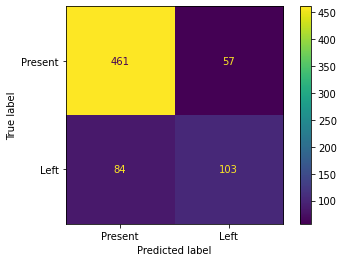

In [33]:
plot_confusion_matrix(model_xgb,x_test,y_test,values_format='d',display_labels=['Present','Left'])

In [34]:
print(f'{round((454/(454+64))*100,2)}% employees are correctly classified as present !!!')
print(f'{round((106/(106+81))*100,2)}% employees are correctly classified as Left !!!')

87.64% employees are correctly classified as present !!!
56.68% employees are correctly classified as Left !!!


### Now we will use some Cross validation technique to improve models performance